### 공통된 문제파일 찾아내기
- 예) gau 에서 16번 문제 파일이 다른 blur 에서도 있음

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import os


In [153]:
# NRIQA_df_last=pd.read_csv('C:/Users/Home/Desktop/IQA/NRIQA_df_last.csv')

In [154]:
# NRIQA_df_last

CPBD    NIQE  BRISQUE  CNNIQA  ILNIQE   HYPER  WaDIQaM_LIVE  \
0     0.524  15.288   18.468  17.725  22.025  67.377         7.515   
1     0.407  16.106   26.225  21.482  24.490  59.614        26.515   
2     0.131  18.836   50.731  43.691  36.201  42.574        44.362   
3     0.005  18.813   70.424  61.468  59.741  38.503        56.649   
4     0.000  17.540   90.263  78.708  90.068  43.387        52.663   
...     ...     ...      ...     ...     ...     ...           ...   
1210  0.586   9.889    1.867  24.134  28.267  64.626        50.081   
1211  0.430  16.853   14.119  31.408  28.785  52.423        44.000   
1212  0.472  20.821   28.383  40.116  35.516  40.440        48.820   
1213  0.104  18.558   54.815  41.899  47.930  34.846        54.851   
1214  0.073  19.634   25.641  46.625  47.633  31.975        45.720   

      DIQaM_LIVE  WaDIQaM_TID  DIQaM_TID  DMOS       DIST_IMG  
0         29.026       34.108     35.453  4.57  I01_01_01.png  
1         35.895       33.785     35.580  4.33  I01_01_02.png  
2         47.225       43.473     37.948  2.67  I01_01_03.png  
3         58.178       58.608     40.670  1.67  I01_01_04.png  
4         65.557       78.039     36.814  1.10  I01_01_05.png  
...          ...          ...        ...   ...            ...  
1210      28.706       44.715     46.724  4.80  I81_03_01.png  
1211      33.874       47.563     48.657  4.27  I81_03_02.png  
1212      42.019       54.019     53.369  2.60  I81_03_03.png  
1213      43.308       58.022     53.953  2.17  I81_03_04.png  
1214      45.908       53.080     57.498  1.53  I81_03_05.png  

[1215 rows x 12 columns]

In [155]:
# 이상치 인덱스 추출

In [ ]:
# answer=list()
# for idx,i in enumerate(a[::5]):
#     print(idx)
#     i=a.index(i,idx)
#     for idx2,x in enumerate(a[i:i+5]):
#         x=a[i:i+5].index(x,idx2)
        
        
#         try :
#             if a[i:i+5][x]< a[i:i+5][x+1]:
#                 answer.append((a[i:i+5][x+1],(idx*5)+a[i:i+5].index(a[i:i+5][x+1],idx2)))
            
#         except IndexError:
#             pass

### blur_gau

In [4]:
NRIQA_df_ffhq_gau=pd.read_csv('C:/Users/Home/Desktop/IQA/NRIQA_df_ffhq_gau.csv')

In [6]:
def find_blur_level_reverse(NR):
    # cnn brisque niqe WaDIQaM
    answer=list()
    for idx,i in enumerate(NR[::5]):
        
        i=NR.index(i,idx)
        for idx2,x in enumerate(NR[i:i+5]):
            x=NR[i:i+5].index(x,idx2)
            
            
            try :
                if NR[i:i+5][x]> NR[i:i+5][x+1]:
                    # answer.append((NR[i:i+5][x+1],NR[i:i+5].index(NR[i:i+5][x+1],idx2)))
                    answer.append((idx*5)+NR[i:i+5].index(NR[i:i+5][x+1],idx2))
            except IndexError:
                pass
    return answer

In [7]:
def find_blur_level(NR):
    # cpbd hyper
    answer=list()
    for idx,i in enumerate(NR[::5]):
        
        i=NR.index(i,idx)
        for idx2,x in enumerate(NR[i:i+5]):
            x=NR[i:i+5].index(x,idx2)
            
            
            try :
                if NR[i:i+5][x]< NR[i:i+5][x+1]:
                    # answer.append((NR[i:i+5][x+1],NR[i:i+5].index(NR[i:i+5][x+1],idx2)))
                    answer.append((idx*5)+NR[i:i+5].index(NR[i:i+5][x+1],idx2))
                
            except IndexError:
                pass
    return answer


In [8]:
NIQE=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['NIQE']))
BRISQUE=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['BRISQUE']))
CNNIQA=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['CNNIQA']))
WaDIQaM_LIVE=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['WaDIQaM_LIVE']))
DIQaM_LIVE=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['DIQaM_LIVE']))
WaDIQaM_TID=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['WaDIQaM_TID']))
DIQaM_TID=find_blur_level_reverse(list(NRIQA_df_ffhq_gau['DIQaM_TID']))


In [9]:
CPBD=find_blur_level(list(NRIQA_df_ffhq_gau['CPBD']))
HYPER=find_blur_level(list(NRIQA_df_ffhq_gau['HYPER']))


In [11]:
intersection_gau =set(CPBD) & set(NIQE) & set(BRISQUE) & set(CNNIQA) & set(HYPER) & set(WaDIQaM_LIVE) & set(DIQaM_LIVE)& set(WaDIQaM_TID)& set(DIQaM_TID)

In [35]:
print(intersection_gau)
print('\n')
print("총 개수 :", len(intersection_gau))

{3626, 3054, 656, 1681, 1809, 3636, 1269, 379, 4924, 2399}


총 개수 : 10


### Blur_lens

In [18]:
NRIQA_df_ffhq_lens=pd.read_csv('C:/Users/Home/Desktop/IQA/NRIQA_df_ffhq_lens.csv')

In [19]:
NIQE_lens=find_blur_level_reverse(list(NRIQA_df_ffhq_lens['NIQE']))
BRISQUE_lens=find_blur_level_reverse(list(NRIQA_df_ffhq_lens['BRISQUE']))
CNNIQA_lens=find_blur_level_reverse(list(NRIQA_df_ffhq_lens['CNNIQA']))
WaDIQaM_LIVE_lens=find_blur_level_reverse(list(NRIQA_df_ffhq_lens['WaDIQaM_LIVE']))
DIQaM_LIVE_lens=find_blur_level_reverse(list(NRIQA_df_ffhq_lens['DIQaM_LIVE']))
WaDIQaM_TID_lens=find_blur_level_reverse(list(NRIQA_df_ffhq_lens['WaDIQaM_TID']))
DIQaM_TID_lens=find_blur_level_reverse(list(NRIQA_df_ffhq_lens['DIQaM_TID']))

In [20]:
CPBD_lens=find_blur_level(list(NRIQA_df_ffhq_lens['CPBD']))
HYPER_lens=find_blur_level(list(NRIQA_df_ffhq_lens['HYPER']))

In [21]:
intersection_lens =set(CPBD_lens) & set(NIQE_lens) & set(BRISQUE_lens) & set(CNNIQA_lens) & set(HYPER_lens) & set(WaDIQaM_LIVE_lens) & set(DIQaM_LIVE_lens)& set(WaDIQaM_TID_lens)& set(DIQaM_TID_lens)

In [33]:
print(intersection_lens, end=' ')
print('\n')
print("총 개수 :", len(intersection_lens))

{4613, 1542, 7, 3591, 2058, 23, 5151, 4128, 554, 2091, 2606, 1079, 2617, 3643, 4157, 3646, 64, 3654, 77, 3151, 1616, 5713, 1107, 2132, 597, 5728, 612, 2153, 2666, 5737, 3692, 113, 626, 2164, 1148, 4733, 2178, 3717, 2182, 1674, 652, 2706, 1174, 3734, 2714, 5281, 2724, 682, 5296, 1713, 3762, 4277, 3253, 1721, 2237, 197, 721, 3801, 224, 2784, 3296, 5856, 4331, 4333, 5871, 2301, 771, 1286, 3846, 777, 267, 1803, 788, 793, 1311, 5921, 3362, 2856, 818, 5946, 2384, 1361, 3921, 4438, 5463, 4441, 1881, 2918, 2921, 5482, 1391, 371, 2932, 3956, 2942, 1412, 3974, 903, 2953, 1932, 1947, 929, 434, 4531, 4018, 1971, 1974, 957, 467, 4567, 987, 2014, 487, 2541, 499, 5116, 511} 

총 개수 : 117


### blur_motion

In [36]:
NRIQA_df_ffhq_motion=pd.read_csv('C:/Users/Home/Desktop/IQA/NRIQA_df_ffhq_motion.csv')

In [37]:
NIQE_motion=find_blur_level_reverse(list(NRIQA_df_ffhq_motion['NIQE']))
BRISQUE_motion=find_blur_level_reverse(list(NRIQA_df_ffhq_motion['BRISQUE']))
CNNIQA_motion=find_blur_level_reverse(list(NRIQA_df_ffhq_motion['CNNIQA']))
WaDIQaM_LIVE_motion=find_blur_level_reverse(list(NRIQA_df_ffhq_motion['WaDIQaM_LIVE']))
DIQaM_LIVE_motion=find_blur_level_reverse(list(NRIQA_df_ffhq_motion['DIQaM_LIVE']))
WaDIQaM_TID_motion=find_blur_level_reverse(list(NRIQA_df_ffhq_motion['WaDIQaM_TID']))
DIQaM_TID_motion=find_blur_level_reverse(list(NRIQA_df_ffhq_motion['DIQaM_TID']))

In [38]:
CPBD_motion=find_blur_level(list(NRIQA_df_ffhq_motion['CPBD']))
HYPER_motion=find_blur_level(list(NRIQA_df_ffhq_motion['HYPER']))

In [39]:
intersection_motion =set(CPBD_motion) & set(NIQE_motion) & set(BRISQUE_motion) & set(CNNIQA_motion) & set(HYPER_motion) & set(WaDIQaM_LIVE_motion) & set(DIQaM_LIVE_motion)& set(WaDIQaM_TID_motion)& set(DIQaM_TID_motion)

In [40]:
print(intersection_motion, end=' ')
print('\n')
print("총 개수 :", len(intersection_motion))

{2563, 3078, 1544, 17, 1042, 1554, 3093, 26, 4649, 44, 3136, 5697, 2116, 1616, 82, 5202, 2146, 2148, 1126, 4203, 1131, 4209, 626, 2178, 131, 1174, 3736, 5274, 676, 682, 3771, 5308, 3263, 4807, 5831, 1736, 2252, 2263, 224, 2784, 5856, 743, 5871, 242, 2293, 3841, 771, 1803, 782, 1296, 788, 5404, 287, 291, 1321, 5932, 4398, 3401, 3408, 2386, 4438, 1881, 3936, 883, 903, 407, 1434, 1947, 3486, 5026, 4021, 446, 991, 4073, 2034, 499, 1012} 

총 개수 : 77


### Blur 전체에서 공통으로 문제된 것

In [43]:
test=intersection_motion & intersection_lens & intersection_gau
print(test)

set()


In [45]:
test2=intersection_motion & intersection_lens
print(test2)
print(len(test2))

{224, 2784, 2178, 5856, 771, 903, 682, 1803, 5871, 1616, 626, 499, 788, 1174, 4438, 1881, 1947}
17


### 오류분포

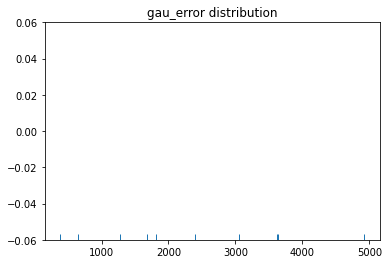

In [52]:
sns.rugplot(list(intersection_gau))
plt.title("gau_error distribution")
plt.show()

In [95]:
gau=sorted(list(intersection_gau))
NRIQA_df_ffhq_gau['DIST_IMG'].loc[gau]

In [99]:
path='E:/24team/gaussian/'

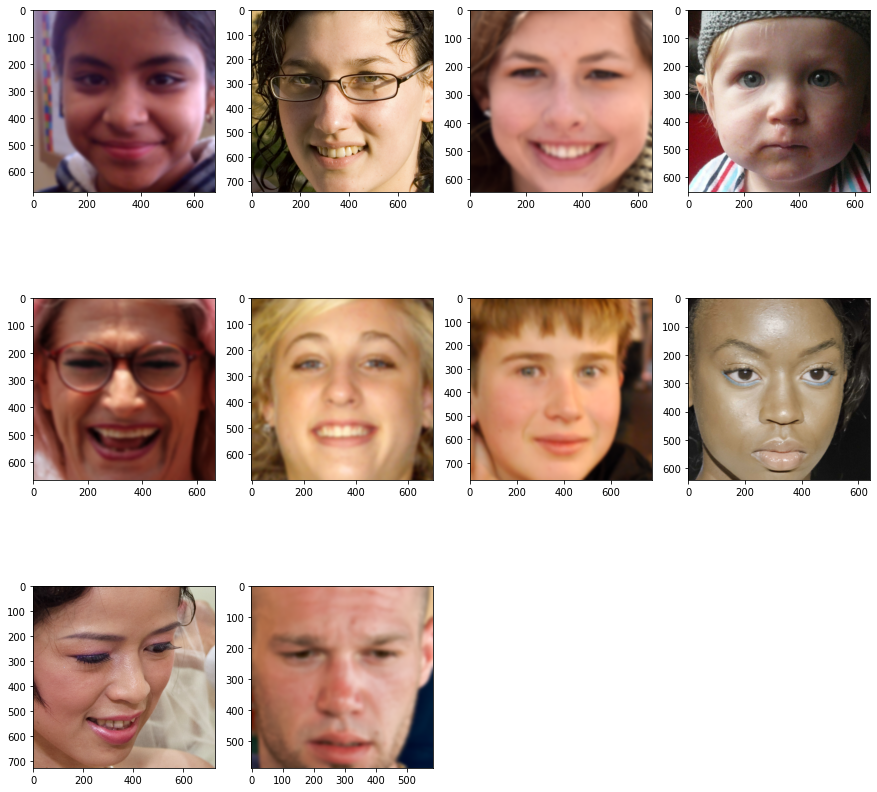

In [104]:
plt.figure(figsize=(15,15))
n=1
for i in NRIQA_df_ffhq_gau['DIST_IMG'].loc[gau] :
    plt.subplot(3, 4, n) #sharex=ax1)
    img=plt.imread(path+f'{i}')
    plt.imshow(img)
    n+=1

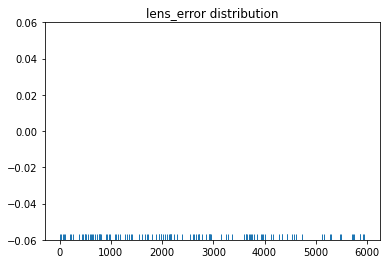

In [53]:
sns.rugplot(list(intersection_lens))
plt.title("lens_error distribution")
plt.show()

In [105]:
lens=sorted(list(intersection_lens))
NRIQA_df_ffhq_lens['DIST_IMG'].loc[lens]

7       0001_02_03.png
23      0005_02_04.png
64      0016_02_05.png
77      0020_02_03.png
113     0029_02_04.png
             ...      
5737    1627_02_03.png
5856    1660_02_02.png
5871    1664_02_02.png
5921    1680_02_02.png
5946    1688_02_02.png
Name: DIST_IMG, Length: 117, dtype: object

In [109]:
path='E:/24team/lens/'

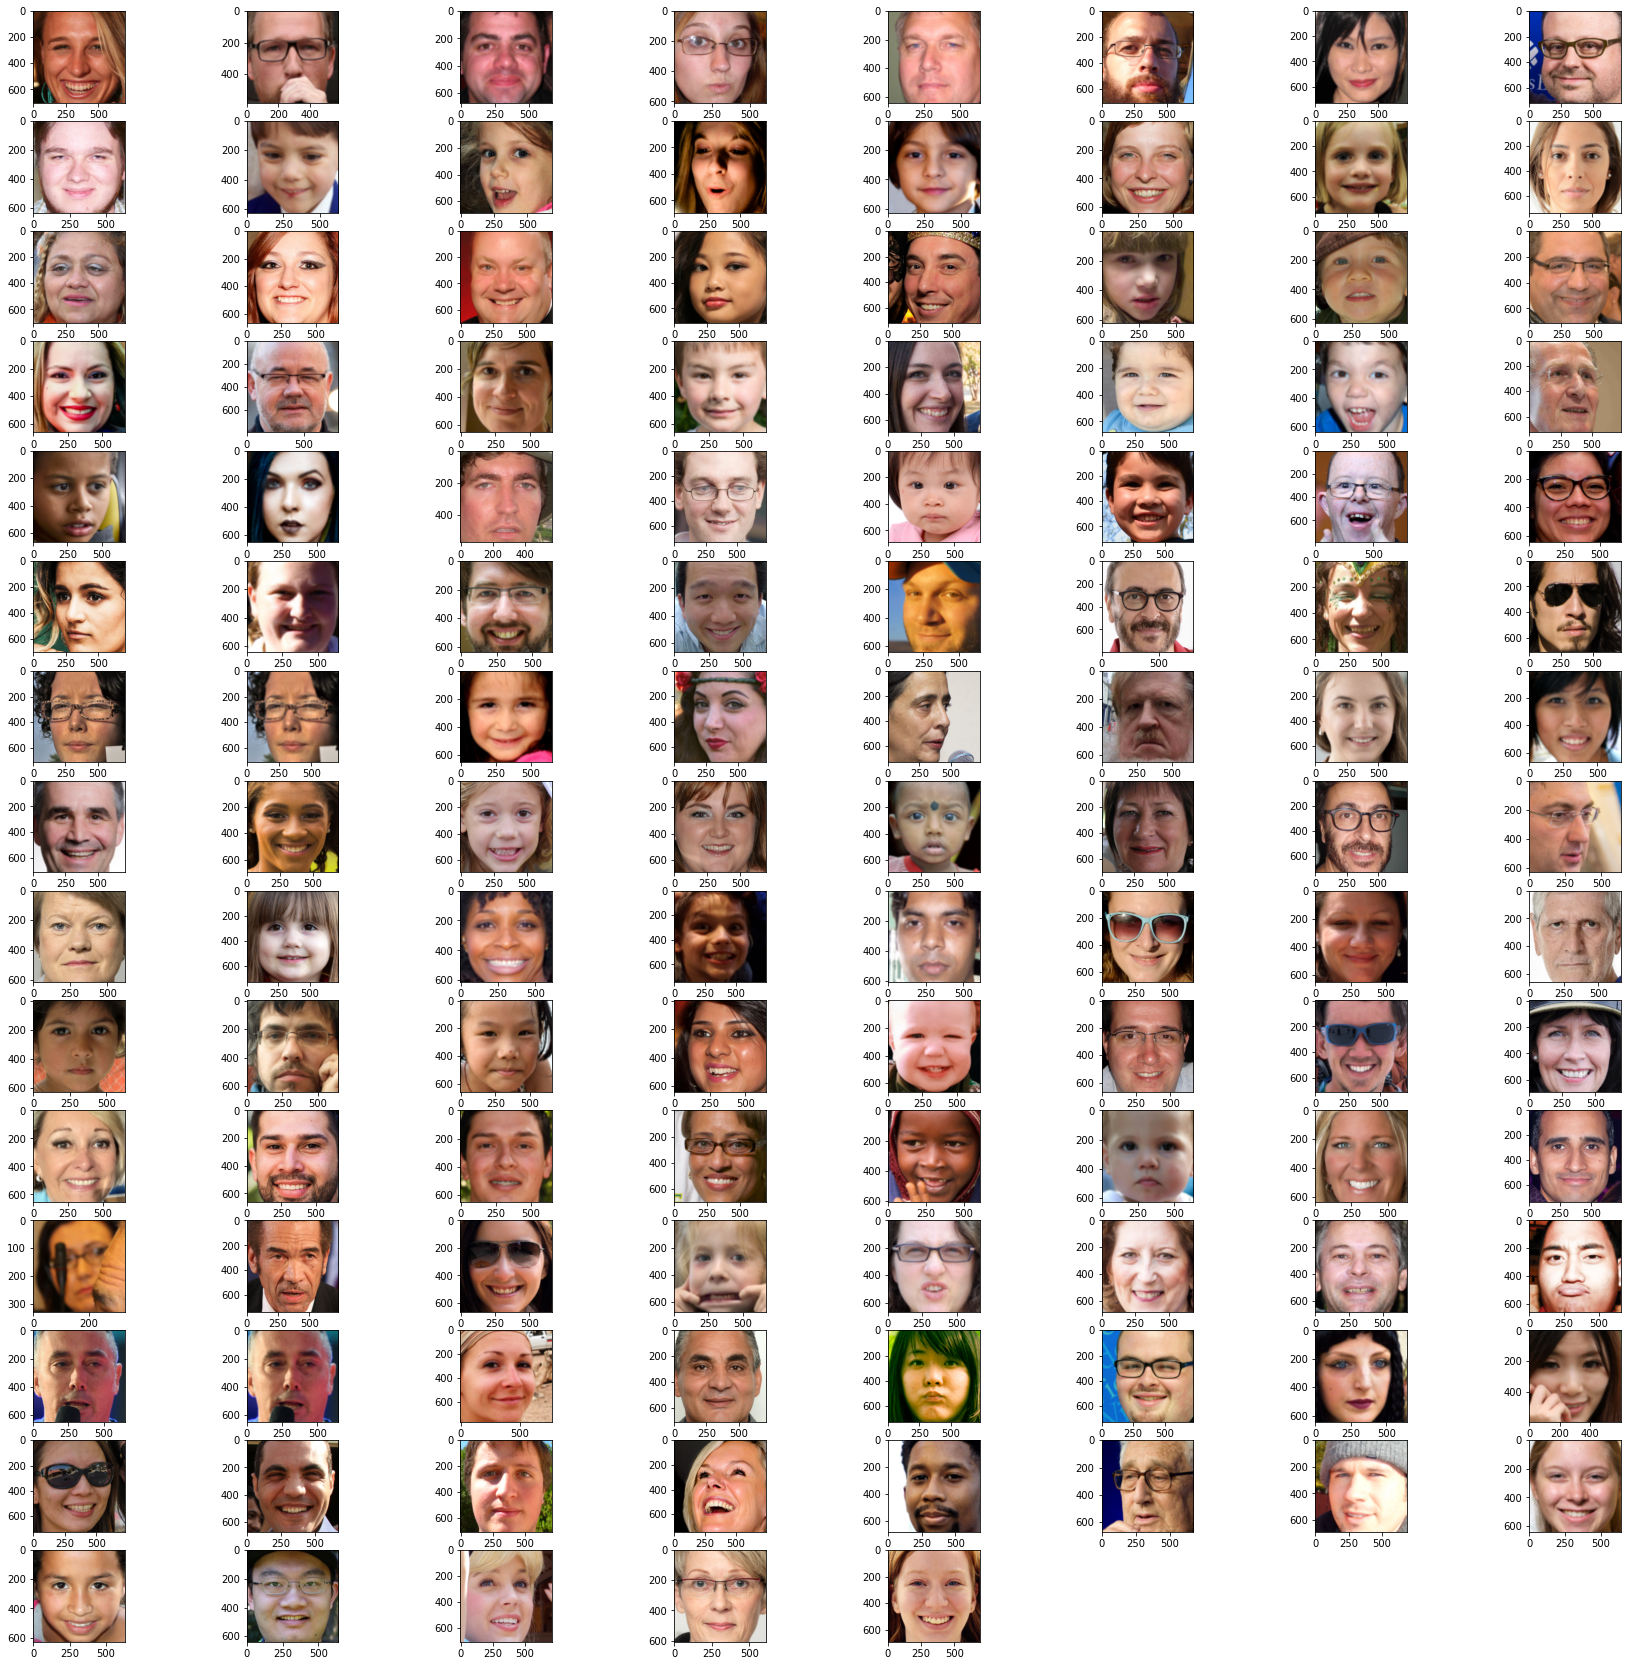

In [112]:
plt.figure(figsize=(30,30))
n=1
for i in NRIQA_df_ffhq_lens['DIST_IMG'].loc[lens] :
    plt.subplot(15, 8, n) #sharex=ax1)
    img=plt.imread(path+f'{i}')
    plt.imshow(img)
    n+=1

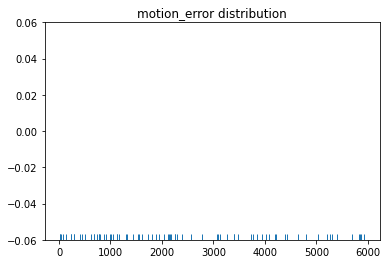

In [54]:
sns.rugplot(list(intersection_motion))
plt.title("motion_error distribution")
plt.show()

In [113]:
motion=sorted(list(intersection_motion))
NRIQA_df_ffhq_motion['DIST_IMG'].loc[motion]

17      0004_03_03.png
26      0006_03_02.png
44      0011_03_05.png
82      0021_03_03.png
131     0037_03_02.png
             ...      
5697    1616_03_03.png
5831    1655_03_02.png
5856    1660_03_02.png
5871    1664_03_02.png
5932    1683_03_03.png
Name: DIST_IMG, Length: 77, dtype: object

In [114]:
path='E:/24team/motion/'

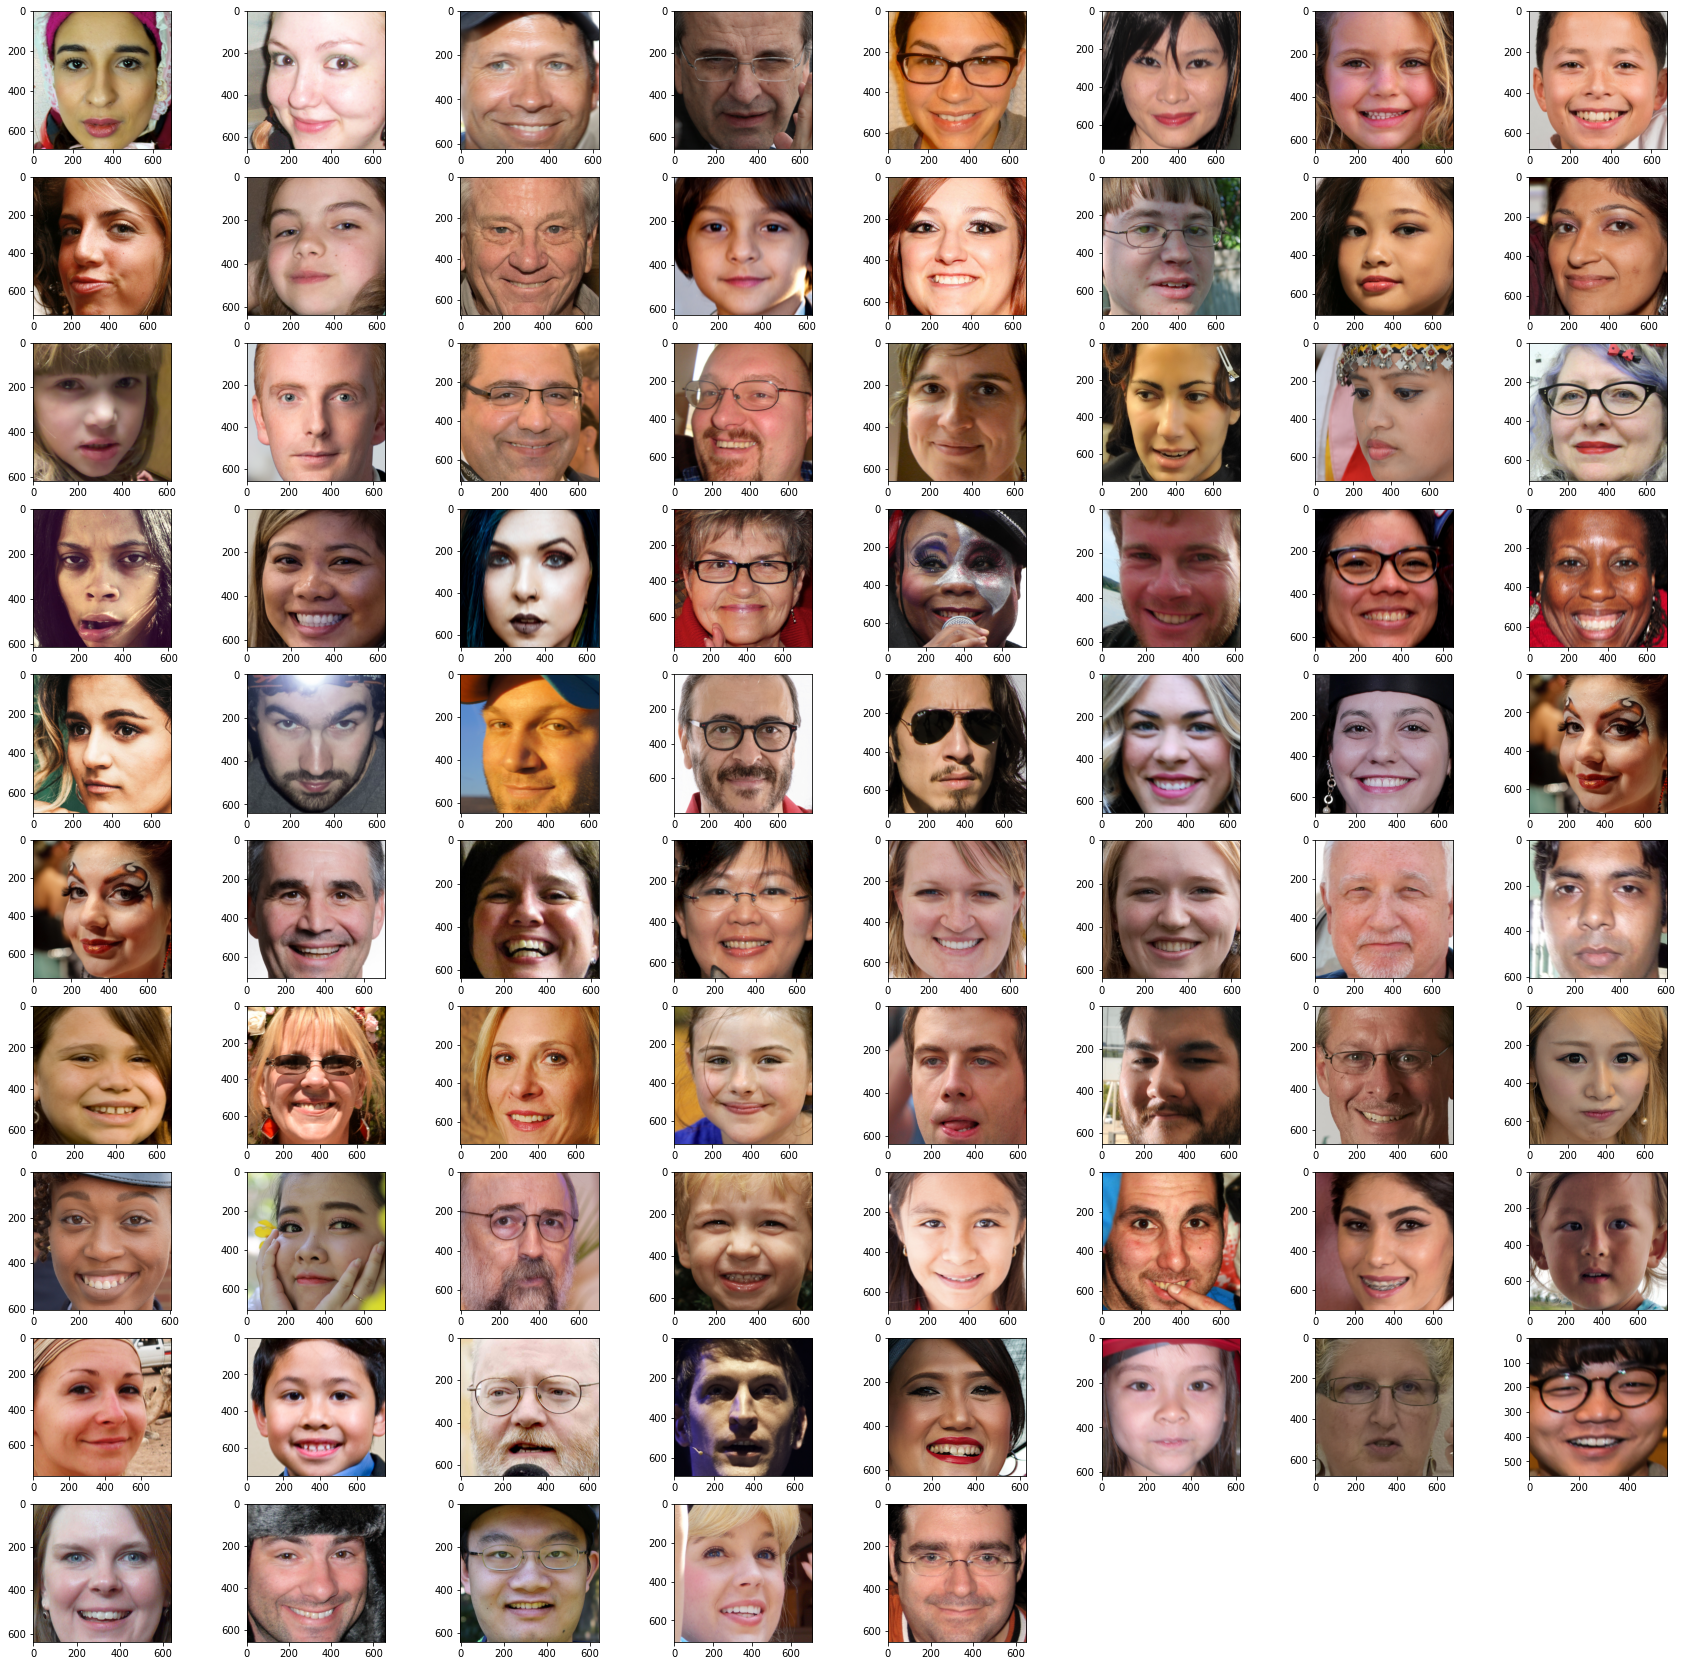

In [115]:
plt.figure(figsize=(30,30))
n=1
for i in NRIQA_df_ffhq_motion['DIST_IMG'].loc[motion] :
    plt.subplot(10, 8, n) #sharex=ax1)
    img=plt.imread(path+f'{i}')
    plt.imshow(img)
    n+=1